# 장애인콜택시 대기시간 예측
## 단계3. 모델링

## 0.미션

* 1.시계열 데이터에 맞는 전처리
    * 데이터가 2015 ~ 2022년까지 데이터 입니다.
    * 이 중 2022년 10월 ~ 2022년 12월까지(3개월)의 데이터는 성능 검증용으로 사용합니다.
    * 나머지 데이터를 이용하여 학습 및 튜닝을 수행합니다.
    * 이를 위한 데이터 전처리를 수행하시오.
* 2.모델 최적화
    * 머신러닝 
        * 알고리즘 중 3가지 이상을 선정하여 모델링을 수행합니다.
        * 각각 알고리즘에 맞는 튜닝 방법으로 최적의 모델을 만듭니다.
    
    * 성능 평가
        * 시계열 그래프로 모델의 실제값과 예측값을 시각화하여 비교합니다.
        * 성능 지표 (MAE, MAPE) 를 사용해 가장 성능이 높은 모델을 선정합니다.
        * 성능 가이드
            * MAE : 4 ~ 6
            * MAPE : 0.09~0.14

## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        * 2) 구글콜랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고, 
            * 데이터 파일을 복사해 넣습니다.
    - 라이브러리 설치 및 로딩
        * requirements.txt 파일로 부터 라이브러리 설치
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.


### (1) 경로 설정

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [ ]:
# path = 'C:/Users/User/project/'

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# path = '/content/drive/MyDrive/project/'

### (2) 라이브러리 설치 및 불러오기

#### 1) 설치

* requirements.txt 파일을 아래 위치에 두고 다음 코드를 실행하시오.
    * 로컬 : 다음 코드셀 실행
    * 구글콜랩 : requirements.txt 파일을 왼쪽 [파일]탭에 복사해 넣고 다음 코드셀 실행

In [ ]:
# !pip install -r requirements.txt

#### 2) 라이브러리 로딩

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

# 필요하다고 판단되는 라이브러리를 추가하세요.
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

### (3) 데이터 불러오기
* 주어진 데이터셋
    * [2.탐색적 데이터분석] 단계에서 저장한 파일 : data2.pkl


In [2]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data = pd.read_csv('data2.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2921 entries, 0 to 2920
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 2921 non-null   object 
 1   avg_wait_time        2921 non-null   float64
 2   avg_wait_time_7      2921 non-null   float64
 3   boarding_rate        2921 non-null   float64
 4   wait_distance_ratio  2921 non-null   float64
 5   year_avg_wait_time   2921 non-null   float64
 6   booking_count        2921 non-null   int64  
 7   boarding_count       2921 non-null   int64  
 8   holiday              2921 non-null   float64
 9   month                2921 non-null   int64  
 10  weekday              2921 non-null   object 
 11  season               2921 non-null   object 
 12  month_avg_wait_time  2921 non-null   float64
 13  booking_wait_ratio   2921 non-null   float64
 14  boarding_wait_ratio  2921 non-null   float64
 15  target               2921 non-null   f

In [3]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data.describe()

,avg_wait_time,avg_wait_time_7,boarding_rate,wait_distance_ratio,year_avg_wait_time,booking_count,boarding_count,holiday,month,month_avg_wait_time,booking_wait_ratio,boarding_wait_ratio,target
count,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000
mean,40.307942,40.279880,0.841580,0.004407,40.307942,3926.209860,3284.401232,0.040739,6.521054,40.307942,103.872181,88.060660,40.311537
std,14.100434,12.044801,0.052181,0.001594,9.604180,1509.649338,1249.080267,0.197720,3.448394,4.294907,44.213415,39.486291,14.097409
min,17.200000,18.800000,0.596996,0.001653,28.045082,527.000000,462.000000,0.000000,1.000000,33.393952,21.564537,15.121107,17.200000
25%,29.600000,31.271429,0.805956,0.003177,30.720822,2162.000000,1779.000000,0.000000,4.000000,38.568952,63.458177,54.635193,29.600000
50%,38.200000,39.014286,0.845660,0.004194,38.272404,4721.000000,3933.000000,0.000000,7.000000,40.381667,106.380753,85.493274,38.200000
75%,48.600000,46.942857,0.877722,0.005386,44.143014,5110.000000,4241.000000,0.000000,10.000000,44.480242,137.656613,117.326203,48.600000
max,96.100000,83.928571,0.968844,0.010927,56.322192,6182.000000,5189.000000,1.000000,12.000000,47.063333,219.402985,198.221154,96.100000


## 2.데이터 준비
* **세부요구사항**
    * NaN에 대한 조치를 수행하시오.
        * rolling 혹은 shift로 발생된 초기 행의 NaN은 삭제해도 무방합니다.
    * 가변수화 : 범주형에 대해서 가변수화를 수행합니다.
    * 데이터분할
        * 시계열 데이터 특성에 맞게 분할합니다.
        * 마지막 91일(3개월) 데이터를 검증셋으로 사용합니다.

### (1) NA 조치

In [4]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data.isna().sum()

Date                   0
avg_wait_time          0
avg_wait_time_7        0
boarding_rate          0
wait_distance_ratio    0
year_avg_wait_time     0
booking_count          0
boarding_count         0
holiday                0
month                  0
weekday                0
season                 0
month_avg_wait_time    0
booking_wait_ratio     0
boarding_wait_ratio    0
target                 0
dtype: int64

### (2) 가변수화

In [5]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
dumm_cols = ['weekday', 'season']
data = pd.get_dummies(data, columns = dumm_cols, drop_first = True, dtype = int)
data.head()

,Date,avg_wait_time,avg_wait_time_7,boarding_rate,wait_distance_ratio,year_avg_wait_time,booking_count,boarding_count,holiday,month,...,target,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,season_Spring,season_Summer,season_Winter
0,2015-01-01,23.2,23.657143,0.903226,0.002155,34.059452,1023,924,1.0,1,...,17.2,0,0,0,1,0,0,0,0,1
1,2015-01-02,17.2,23.657143,0.898987,0.001997,34.059452,3158,2839,0.0,1,...,26.2,0,0,0,0,0,0,0,0,1
2,2015-01-03,26.2,23.657143,0.918689,0.002569,34.059452,1648,1514,0.0,1,...,24.5,0,1,0,0,0,0,0,0,1
3,2015-01-04,24.5,23.657143,0.927096,0.002236,34.059452,1646,1526,0.0,1,...,26.2,0,0,1,0,0,0,0,0,1
4,2015-01-05,26.2,23.657143,0.877647,0.003024,34.059452,4250,3730,0.0,1,...,23.6,1,0,0,0,0,0,0,0,1


### (3) 데이터분할
* **세부요구사항**
    * 마지막 91일 간의 데이터를 검증 셋으로 만듭니다. (2022-10-01 ~ )
    * 이 기간의 날짜 리스트를 별도로 저장하여, 모델 검증시 시각화할 때 활용합니다.

In [6]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data.tail(91)

,Date,avg_wait_time,avg_wait_time_7,boarding_rate,wait_distance_ratio,year_avg_wait_time,booking_count,boarding_count,holiday,month,...,target,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,season_Spring,season_Summer,season_Winter
2830,2022-10-01,50.6,44.057143,0.805775,0.004666,37.476374,2528,2037,0.0,10,...,36.4,0,1,0,0,0,0,0,0,0
2831,2022-10-02,36.4,44.200000,0.842894,0.003369,37.476374,1935,1631,0.0,10,...,24.9,0,0,1,0,0,0,0,0,0
2832,2022-10-03,24.9,41.257143,0.804921,0.002523,37.476374,1707,1374,1.0,10,...,41.0,1,0,0,0,0,0,0,0,0
2833,2022-10-04,41.0,40.885714,0.838764,0.004913,37.476374,5923,4968,0.0,10,...,48.4,0,0,0,0,1,0,0,0,0
2834,2022-10-05,48.4,41.414286,0.834178,0.005793,37.476374,5916,4935,0.0,10,...,46.5,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2916,2022-12-26,39.2,43.485714,0.828983,0.004969,37.476374,5555,4605,0.0,12,...,44.4,1,0,0,0,0,0,0,0,1
2917,2022-12-27,44.4,42.771429,0.825909,0.005429,37.476374,5635,4654,0.0,12,...,44.8,0,0,0,0,1,0,0,0,1
2918,2022-12-28,44.8,43.514286,0.822073,0.005684,37.476374,5654,4648,0.0,12,...,52.5,0,0,0,0,0,1,0,0,1
2919,2022-12-29,52.5,42.957143,0.808952,0.006226,37.476374,5250,4247,0.0,12,...,38.3,0,0,0,1,0,0,0,0,1


In [7]:
date = data['Date']
date = date[-91: ].values
date

array(['2022-10-01', '2022-10-02', '2022-10-03', '2022-10-04',
       '2022-10-05', '2022-10-06', '2022-10-07', '2022-10-08',
       '2022-10-09', '2022-10-10', '2022-10-11', '2022-10-12',
       '2022-10-13', '2022-10-14', '2022-10-15', '2022-10-16',
       '2022-10-17', '2022-10-18', '2022-10-19', '2022-10-20',
       '2022-10-21', '2022-10-22', '2022-10-23', '2022-10-24',
       '2022-10-25', '2022-10-26', '2022-10-27', '2022-10-28',
       '2022-10-29', '2022-10-30', '2022-10-31', '2022-11-01',
       '2022-11-02', '2022-11-03', '2022-11-04', '2022-11-05',
       '2022-11-06', '2022-11-07', '2022-11-08', '2022-11-09',
       '2022-11-10', '2022-11-11', '2022-11-12', '2022-11-13',
       '2022-11-14', '2022-11-15', '2022-11-16', '2022-11-17',
       '2022-11-18', '2022-11-19', '2022-11-20', '2022-11-21',
       '2022-11-22', '2022-11-23', '2022-11-24', '2022-11-25',
       '2022-11-26', '2022-11-27', '2022-11-28', '2022-11-29',
       '2022-11-30', '2022-12-01', '2022-12-02', '2022-

#### 1) x, y 나누기

In [8]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# x와 y 분리
X = data.drop(['target', 'Date'], axis = 1)
y = data.loc[:, 'target']

#### 2) train : validation 나누기
* 힌트 : train_test_split(  ,   ,  test_size = 91, shuffle = False) 

In [9]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 91, shuffle = False, random_state = 1)

### (4) Scaling
* KNN, SVM 알고리즘을 적용하기 위해서는 스케일링을 해야 합니다.

In [10]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# MinMaxScaler()
scaler = MinMaxScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s = scaler.transform(X_val)

## 3.모델링
* **세부요구사항**
    * 머신러닝 알고리즘 중 3가지 이상을 사용하여 모델을 만들고 튜닝을 수행합니다.
    * 성능 측정은 MAE, MAPE로 수행합니다.
    * 모델링 후 실제값과 예측값을 시각화(라인차트)하여 분석합니다.

In [12]:
def pred_plot(y_val, pred, date):
    plt.figure(figsize = (18,6))
    sns.lineplot(x=date, y = y_val.values, label = 'actual value', marker = 'o')
    sns.lineplot(x=date, y = pred, label = 'predicted value', marker = 'o')
    plt.ylim(0,60)
    plt.xticks(rotation = 45)
    plt.grid()
    plt.tight_layout()
    plt.show()

Linear Regression
MAE :  4.3133051835588
MAPE :  0.11010134580813806


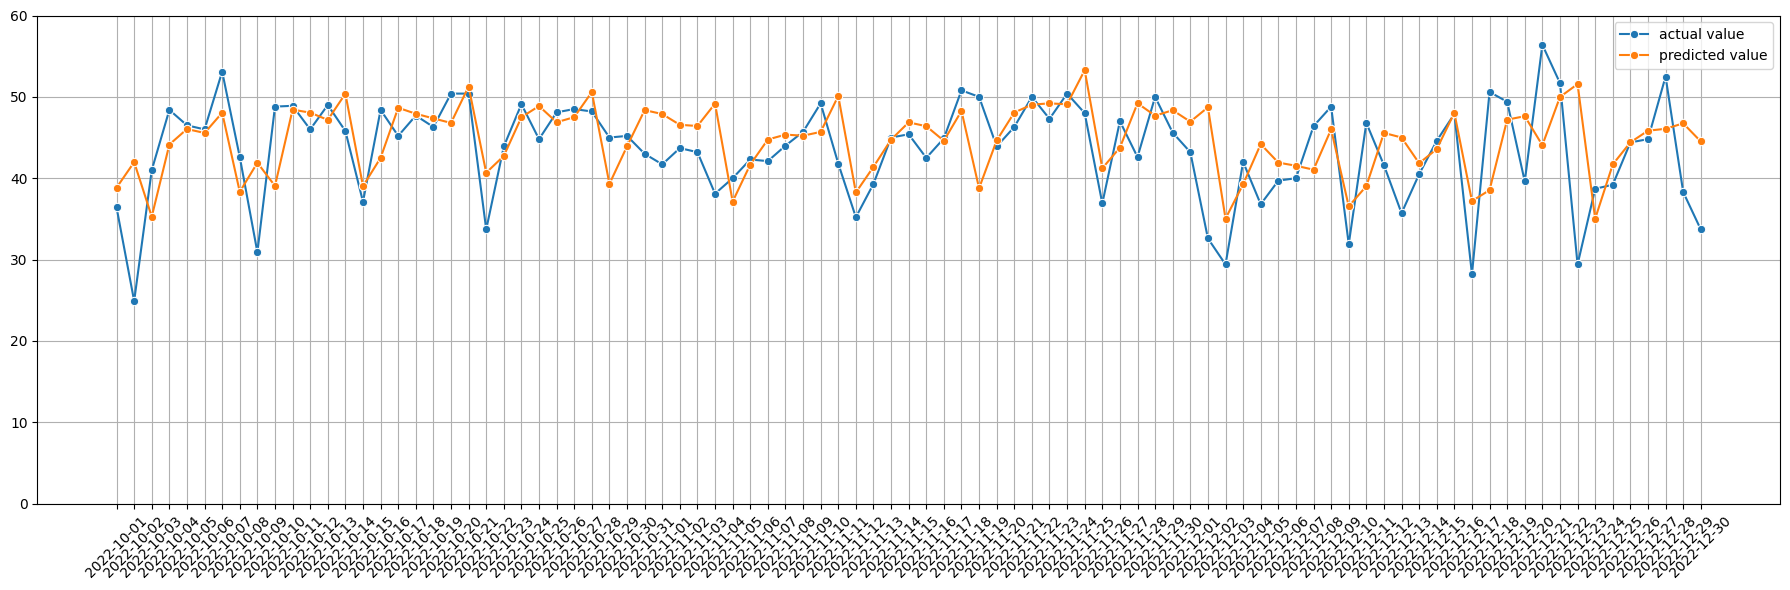

KNN
MAE :  6.17824175824176
MAPE :  0.14818995840196278


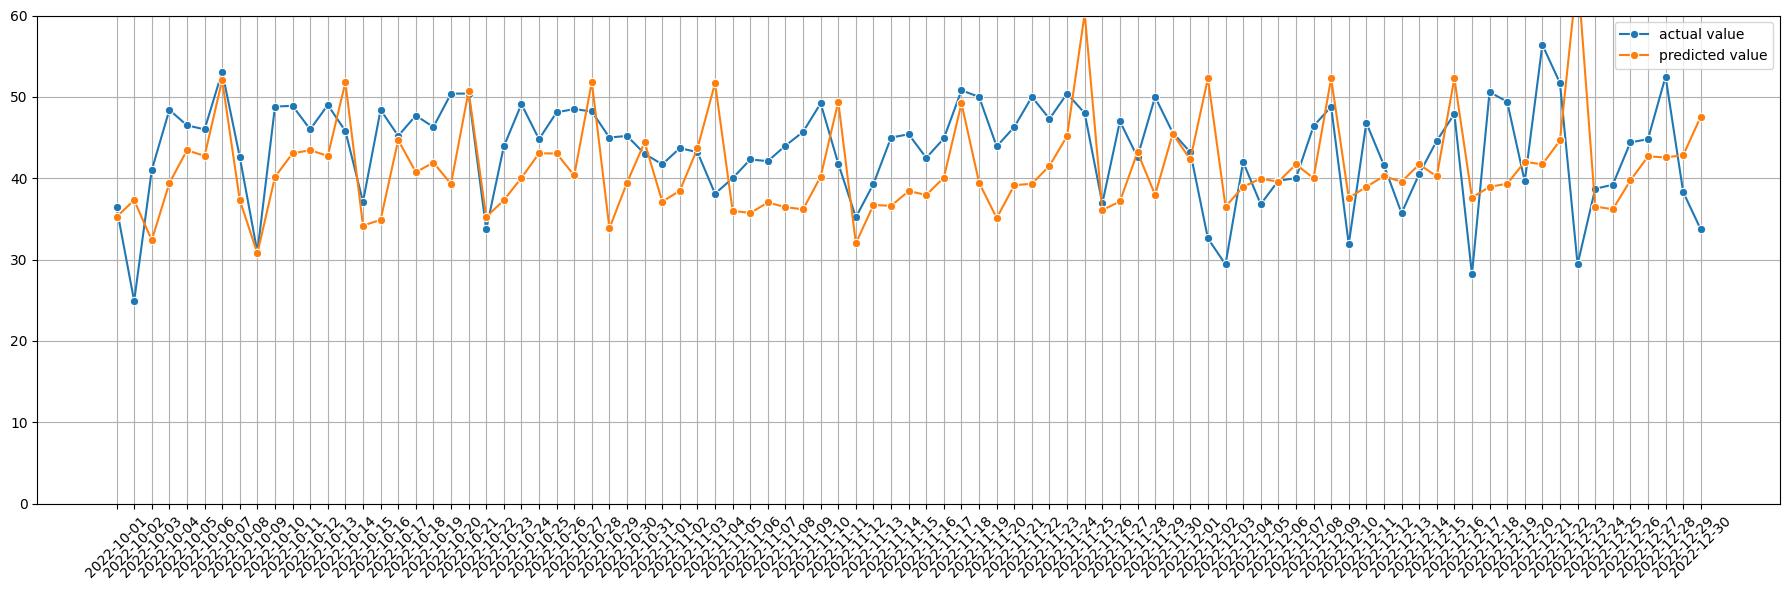

SVM
MAE :  4.29185523485162
MAPE :  0.10782265252323539


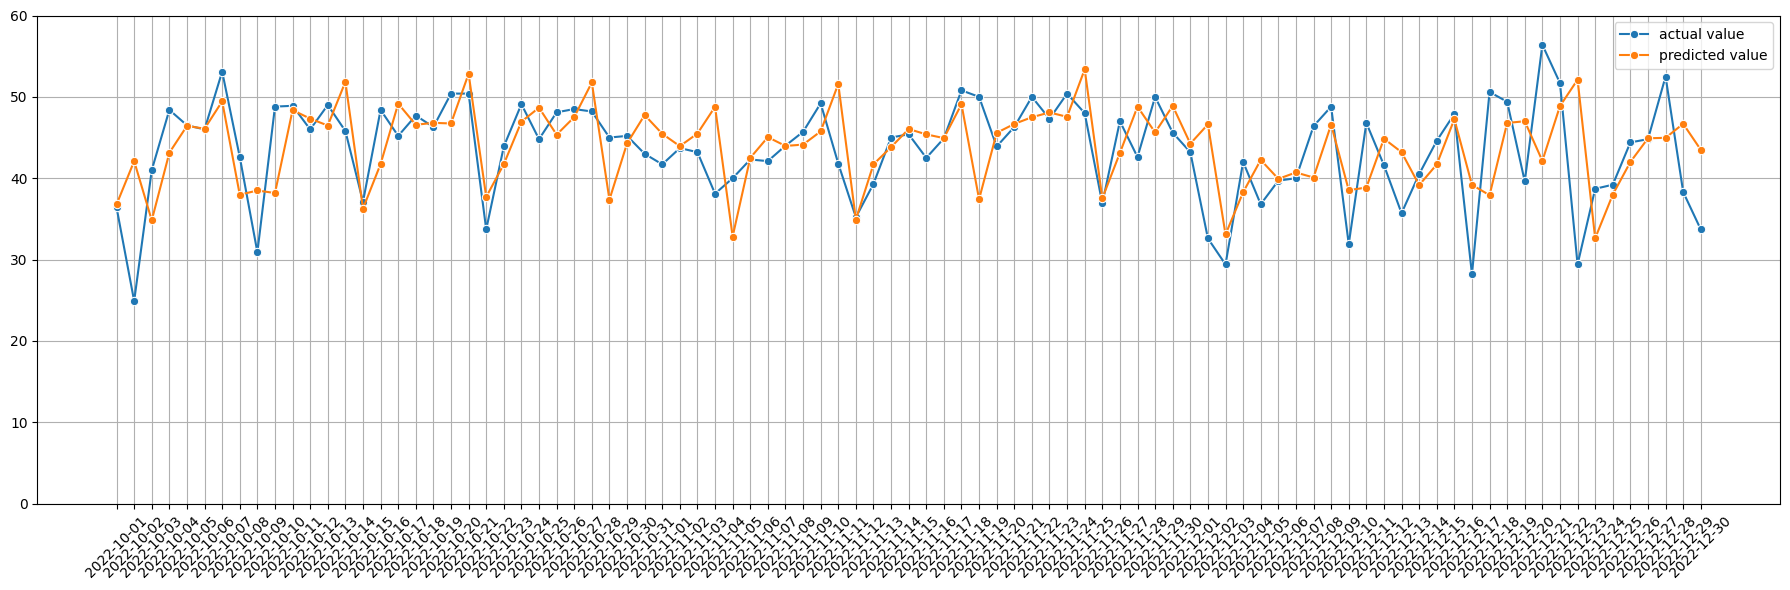

Decision Tree
MAE :  8.442857142857143
MAPE :  0.20496696847134738


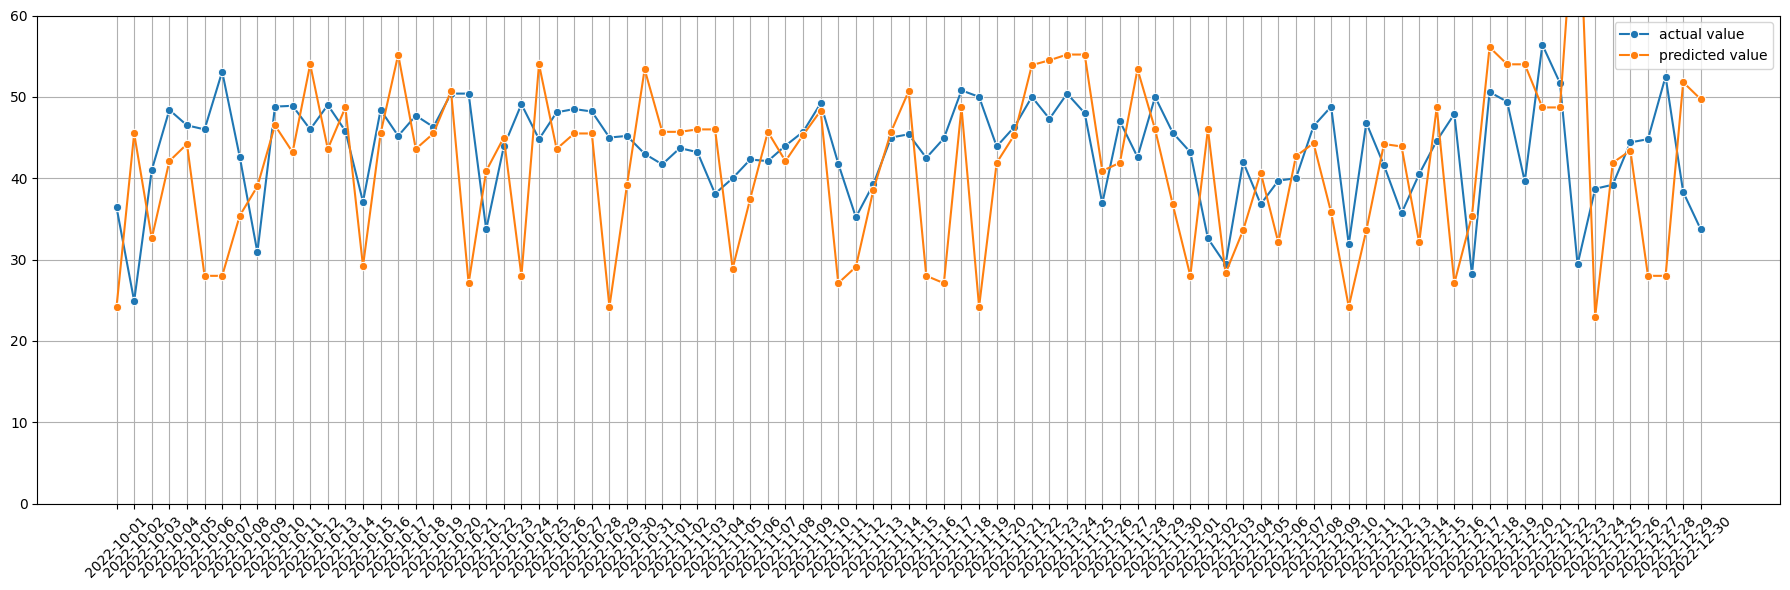

Random Forest
MAE :  4.640604395604395
MAPE :  0.11540138211099037


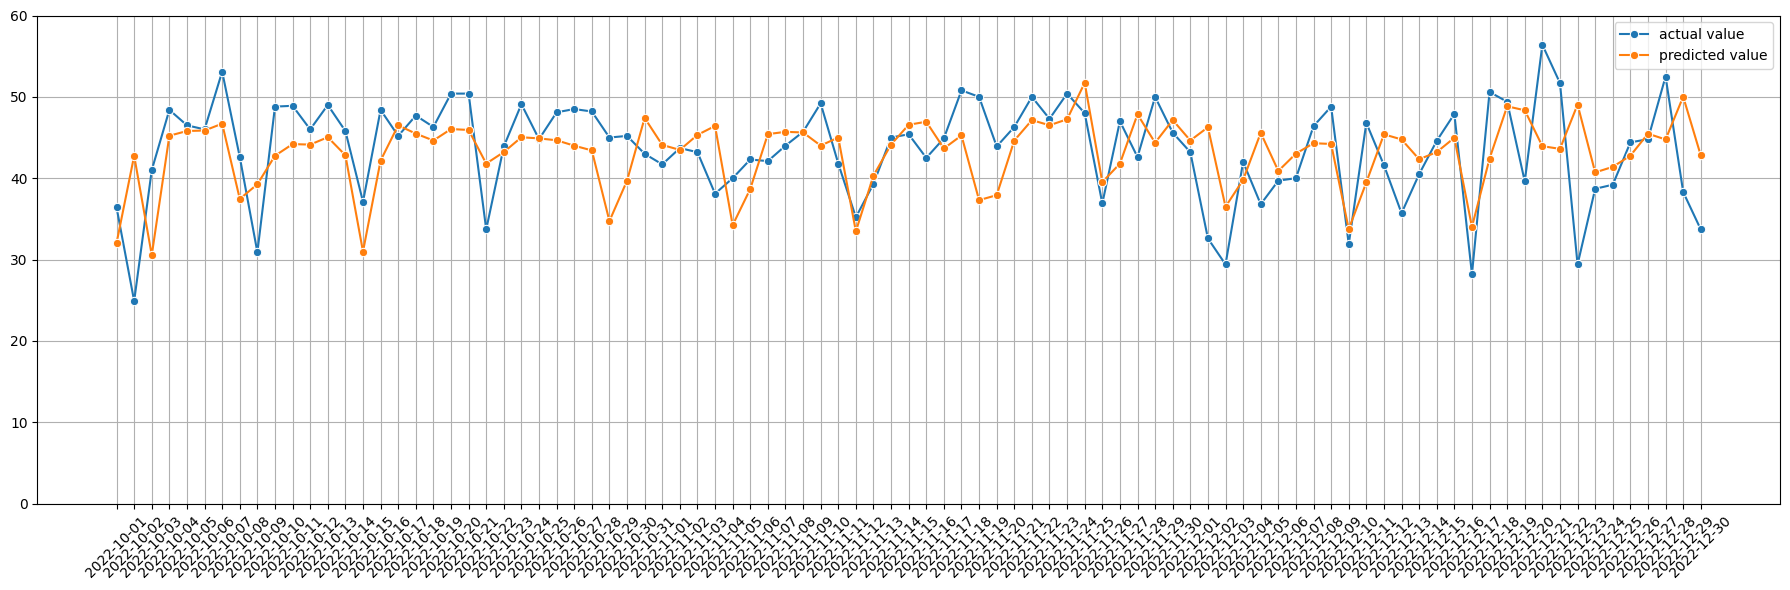

Gradient Boost
MAE :  4.454852357359129
MAPE :  0.10871335885321548


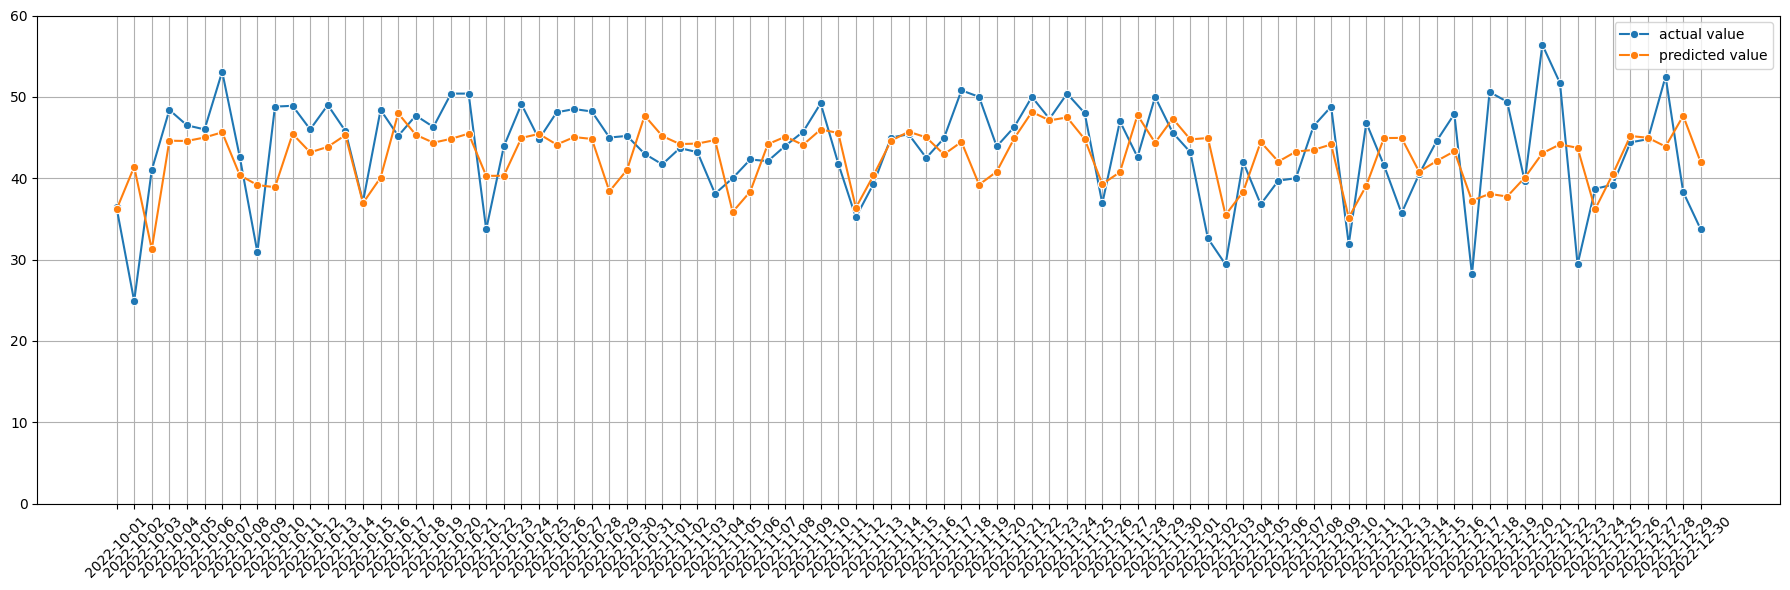

XGBoost
MAE :  5.828914436927208
MAPE :  0.13827119853800615


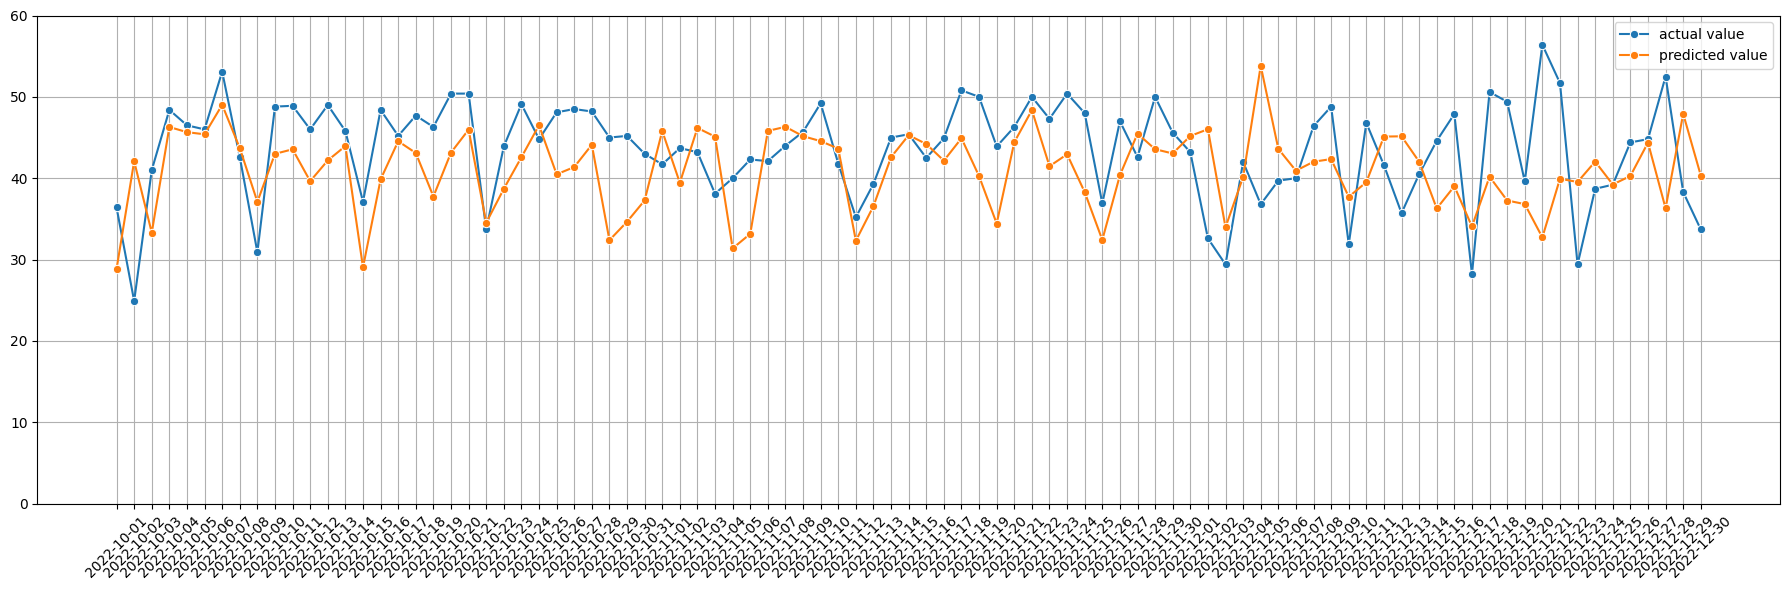

  File "C:\Users\pjj11\anaconda3\envs\test3.7\lib\site-packages\joblib\externals\loky\backend\context.py", line 230, in _count_physical_cores
    cpu_info = cpu_info.stdout.decode('utf-8').splitlines()


LightGBM
MAE :  4.608688394715171
MAPE :  0.11182517262396462


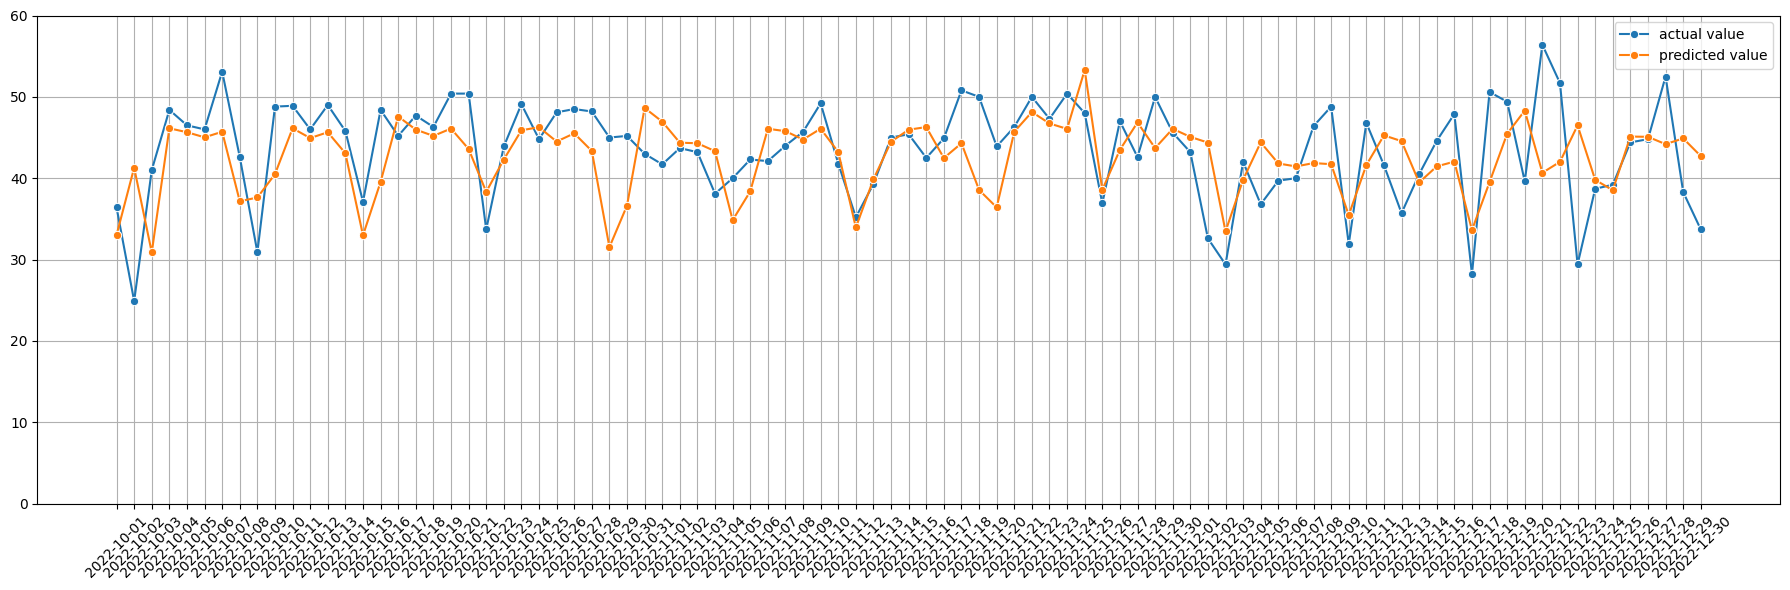

In [13]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
def modeling(models, X_train, X_val, y_train, y_val, X_train_s, X_val_s):
    result = {}
    for model_name, model in models.items():
        if (model_name == 'KNN') or (model_name == 'SVM'):
            model.fit(X_train_s, y_train)
            y_pred = model.predict(X_val_s)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_val)
        
        print('=' * 40)
        print(model_name)
        print('MAE : ', mean_absolute_error(y_val, y_pred))
        print('MAPE : ',mean_absolute_percentage_error(y_val, y_pred))
        
        result[model_name] = mean_absolute_error(y_val, y_pred)
        joblib.dump(model, f'{model_name}.pkl')
        pred_plot(y_val, y_pred, date)
        
    return result


models = {
    'Linear Regression' : LinearRegression(), 
    'KNN' : KNeighborsRegressor(), 
    'SVM' : SVR(), 
    'Decision Tree' : DTR(random_state = 1), 
    'Random Forest' : RFR(random_state = 1), 
    'Gradient Boost' : GBR(random_state = 1), 
    'XGBoost' : XGBRegressor(random_state = 1), 
    'LightGBM' : LGBMRegressor(random_state = 1, verbose = -1)
}

result = modeling(models, X_train, X_val, y_train, y_val, X_train_s, X_val_s)

In [14]:
def result_plot(result):
    plt.barh(y = list(result), width = result.values())
    plt.show()

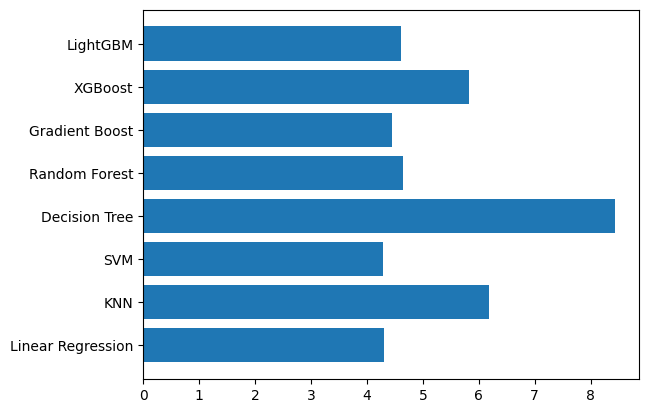

In [15]:
result_plot(result)

## 4. 하이퍼파라미터 튜닝

In [19]:
def grid_tuning_reg(result, models, param, cv = 5, scoring = 'neg_mean_absolute_error'):
    for model_name, model in models.items():
        grid_model = GridSearchCV(model, param, cv = cv, scoring = scoring)

        grid_model.fit(X_train, y_train)
        y_pred = grid_model.best_estimator_.predict(X_val)
        
        print('=' * 40)
        print(model_name)
        print('Best params : ', grid_model.best_params_)
        print('MAE : ', mean_absolute_error(y_val, y_pred))
        print('MAPE : ',mean_absolute_percentage_error(y_val, y_pred))
        
        result[model_name] = mean_absolute_error(y_val, y_pred)
        joblib.dump(grid_model.best_estimator_, f'{model_name}.pkl')
        pred_plot(y_val, y_pred, date)
        
    return result

Decision Tree
Best params :  {'max_depth': 5}
MAE :  5.419112994893379
MAPE :  0.13092137597386574


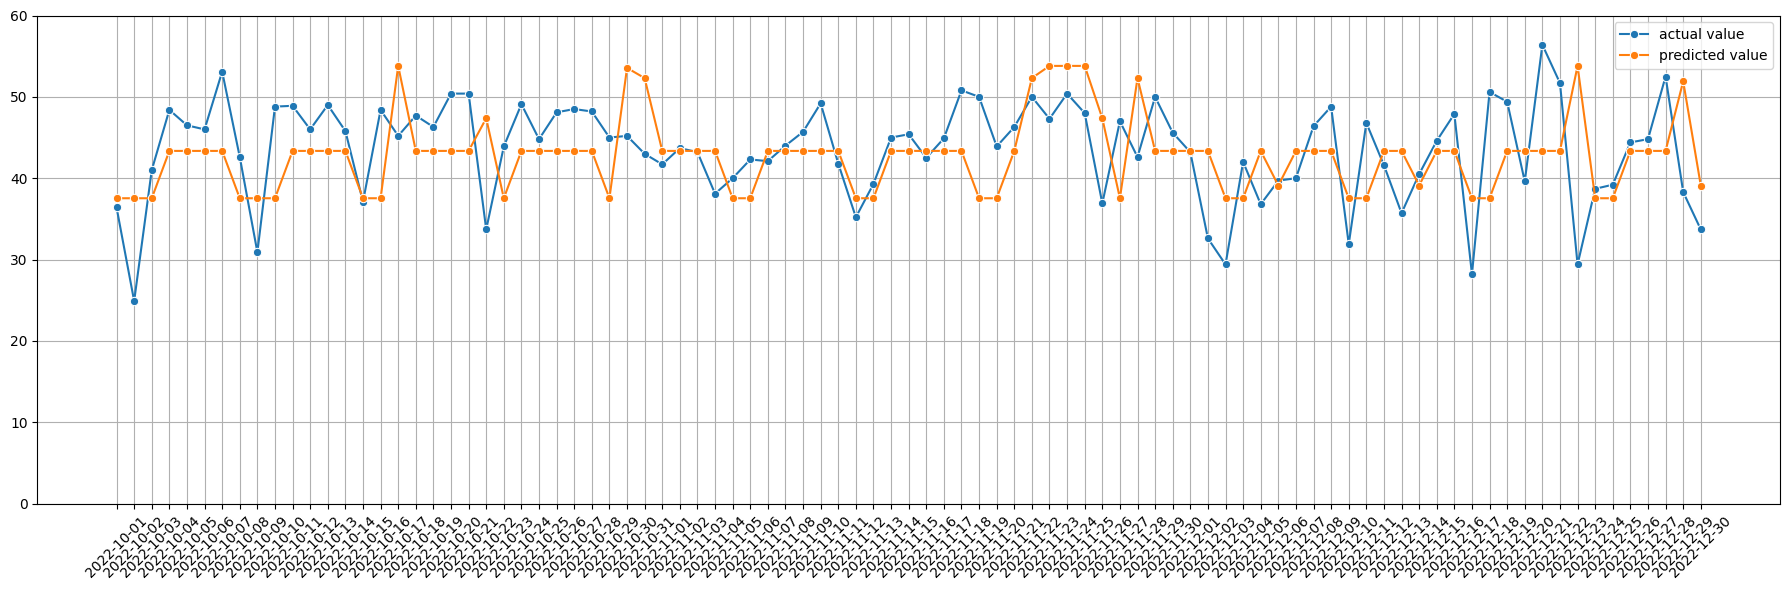

Random Forest
Best params :  {'max_depth': 7}
MAE :  4.5704065233005835
MAPE :  0.11165330136198778


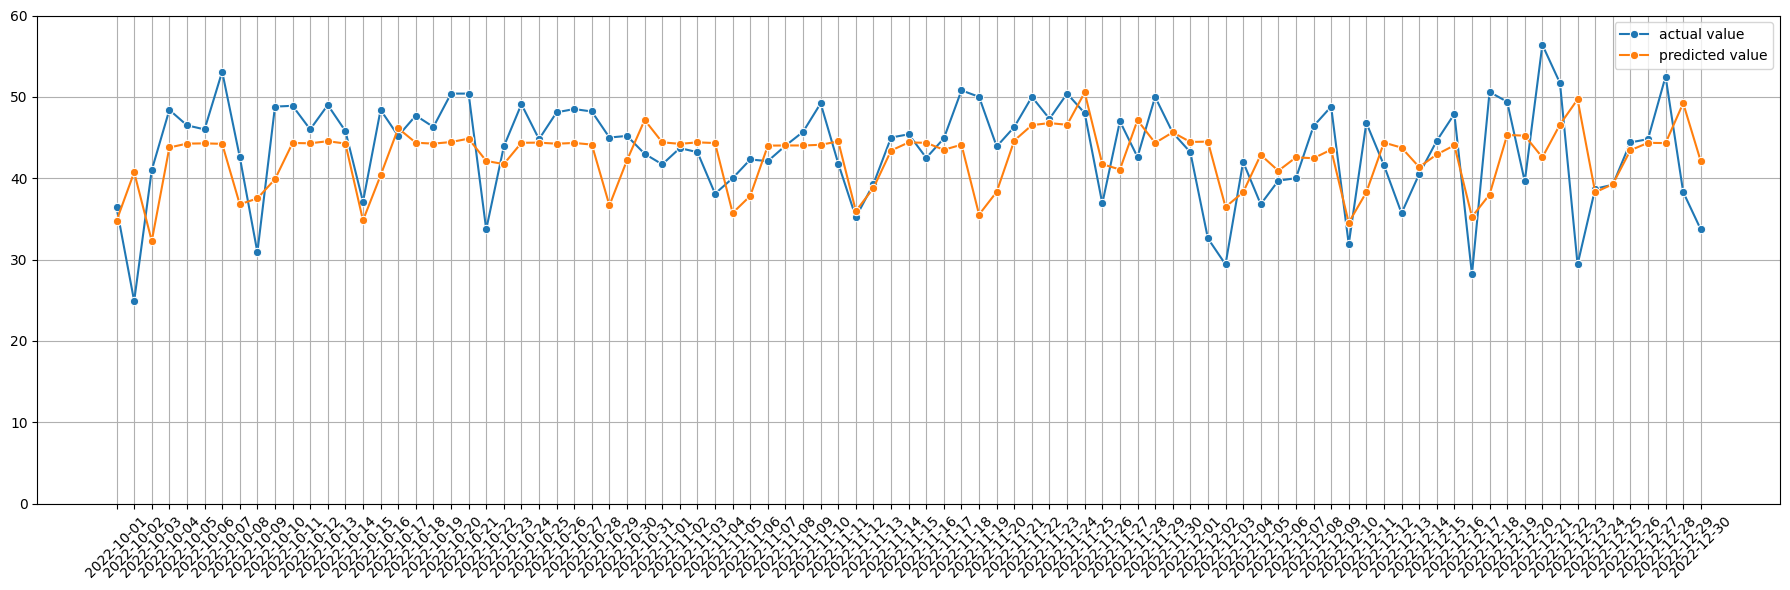

Gradient Boost
Best params :  {'max_depth': 3}
MAE :  4.454852357359129
MAPE :  0.10871335885321548


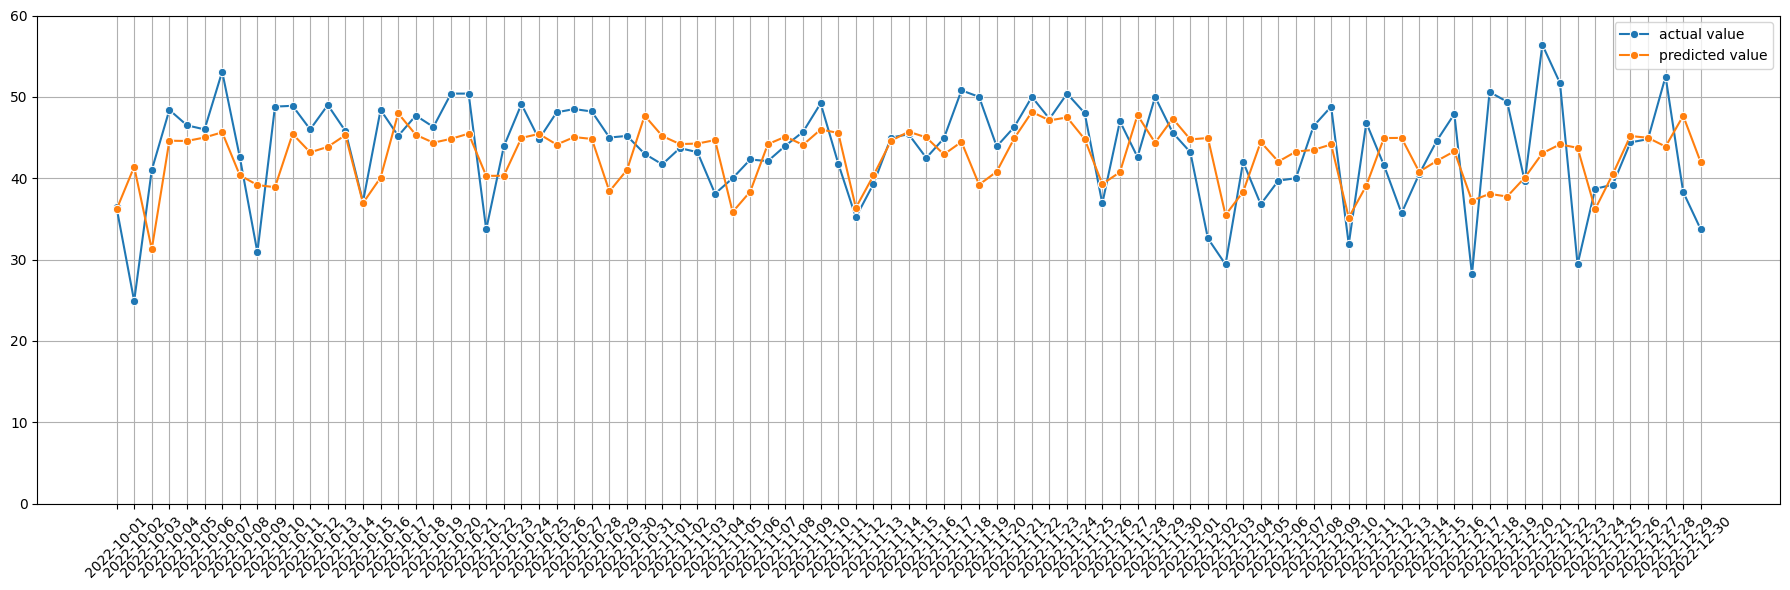

XGBoost
Best params :  {'max_depth': 2}
MAE :  4.788405546251234
MAPE :  0.11850479932033581


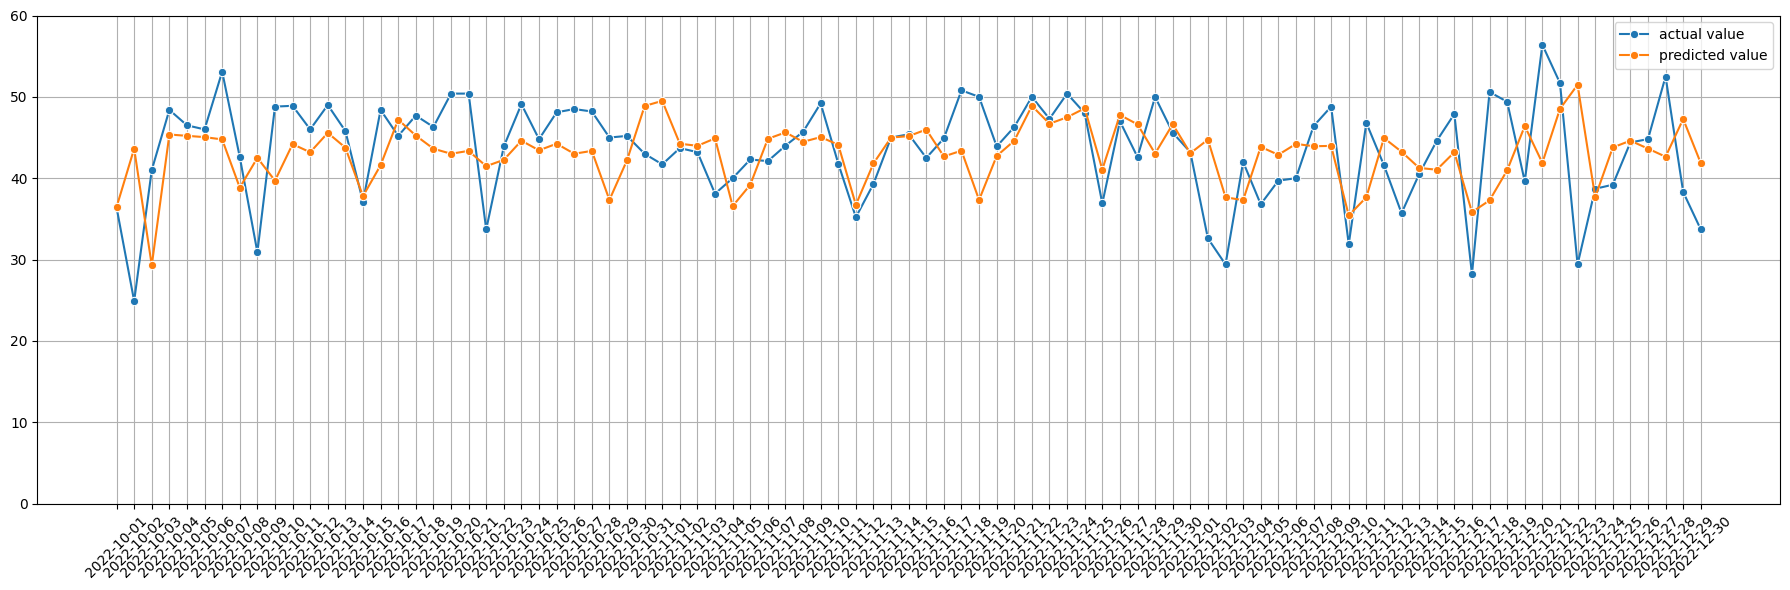

LightGBM
Best params :  {'max_depth': 2}
MAE :  4.56940117063632
MAPE :  0.11288472011047392


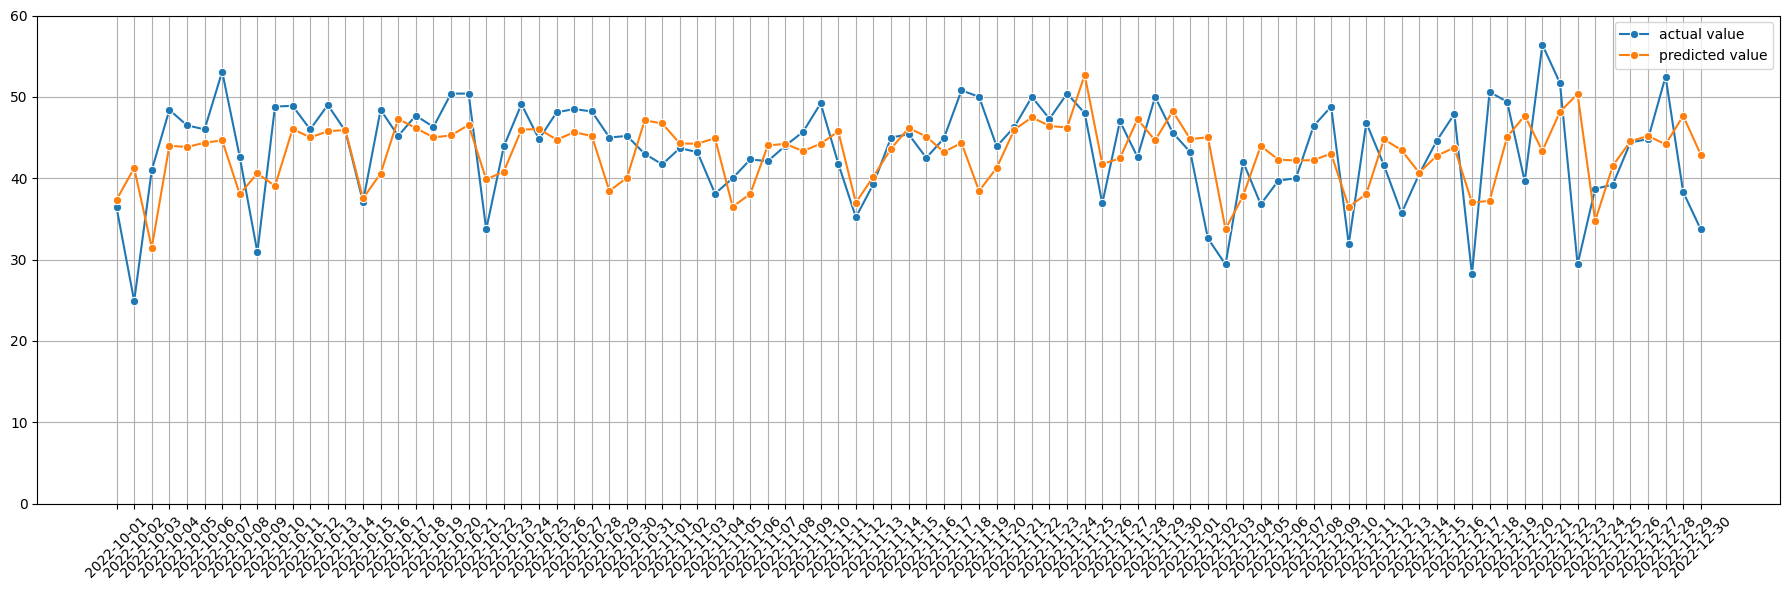

In [20]:
models = {
    'Decision Tree' : DTR(random_state = 1), 
    'Random Forest' : RFR(random_state = 1), 
    'Gradient Boost' : GBR(random_state = 1), 
    'XGBoost' : XGBRegressor(random_state = 1), 
    'LightGBM' : LGBMRegressor(random_state = 1, verbose = -1)
}
param = {'max_depth' : range(1, 21)}


result = grid_tuning_reg(result, models, param)

## 5.모델별 비교
* **세부요구사항**
    * 모델링 단계에서 생성한 모든 모델의 성능을 하나로 모아서 비교합니다.
    * 가장 성능이 높은 모델을 선정합니다.

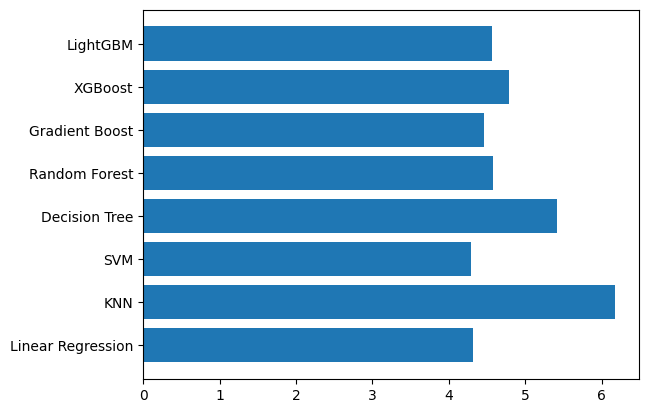

In [21]:
result_plot(result)

- LightGBM feature importances

In [22]:
model_lgb = joblib.load('LightGBM.pkl')
model_lgb

LGBMRegressor(max_depth=2, random_state=1, verbose=-1)

In [31]:
def feature_importances_plot(df):
    plt.figure(figsize=(5, 5))
    plt.barh(df['feature'], df['importance'])
    plt.show()

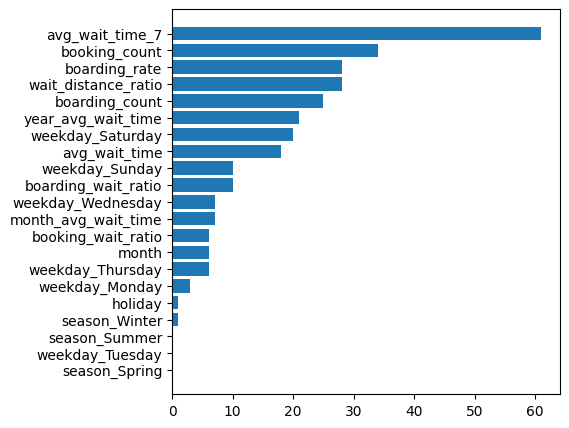

In [45]:
df_lgb = pd.DataFrame()
df_lgb['feature'], df_lgb['importance'] = list(X_train), model_lgb.feature_importances_
df_lgb.sort_values(by='importance', ascending=True, inplace=True)
feature_importances_plot(df_lgb)

In [49]:
k = 8
top_k_features = list(np.array(df_lgb['feature'])[-k:])
top_k_features

['avg_wait_time',
 'weekday_Saturday',
 'year_avg_wait_time',
 'boarding_count',
 'wait_distance_ratio',
 'boarding_rate',
 'booking_count',
 'avg_wait_time_7']

In [54]:
data = data[top_k_features + ['target']]
data.head()

,avg_wait_time,weekday_Saturday,year_avg_wait_time,boarding_count,wait_distance_ratio,boarding_rate,booking_count,avg_wait_time_7,target
0,23.2,0,34.059452,924,0.002155,0.903226,1023,23.657143,17.2
1,17.2,0,34.059452,2839,0.001997,0.898987,3158,23.657143,26.2
2,26.2,1,34.059452,1514,0.002569,0.918689,1648,23.657143,24.5
3,24.5,0,34.059452,1526,0.002236,0.927096,1646,23.657143,26.2
4,26.2,0,34.059452,3730,0.003024,0.877647,4250,23.657143,23.6
